# 1. Definição do Problema

Neste notebook será feita uma pequena análise para realizar o reconhecimento de dígitos escritos à mão. Este é um dos problemas clássicos que são resolvidos através de técnicas de machine learning. É como um código 'Hello World' para quem está iniciando a programar.

Para realizar esta tarefa, eu implementei uma Rede Neural Artificial utilizando a biblioteca Keras, que possui uma forma bastante simples e intuitiva de construir, treinar e avaliar um modelo.

# 2. Obtenção dos Dados

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
import keras
import pandas as pd
from sklearn.metrics import confusion_matrix

%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


Os dados utilizados nesta análise estão disponíveis na biblioteca Keras. Este dataset é composto por 70000 imagens, sendo 60000 para treinamento e 10000 para teste.

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Abaixo é possível ver algumas das imagens que serão utilizadas nas etapas de treinamento e validação do modelo.

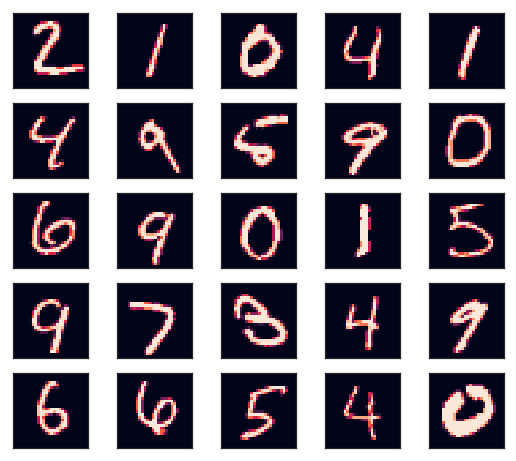

In [3]:
fig=plt.figure(figsize=(9, 8))
columns = 5
rows = 5
for i in range(1, columns*rows + 1):
    img = x_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])

# 3. Preparação dos Dados

Aqui é feia a normalização dos dados. Esta normalização é necessária a fim de diminuir o efeito da diferença de luminosidade entre as imagens e também porque a rede neural converge mais rápido quando se trabalha com valores entre 0 e 1.

In [4]:
x_train = x_train / 255
x_test = x_test / 255

Antes de construir o modelo, é preciso analisar a distribuição de classes dentro do conjunto de treinamento. É necessário que as classes estejam balanceadas para evitar que o modelo fique tendencioso a classificar uma nova observação como sendo pertencente à classe mais predominante no conjunto de treinamento.

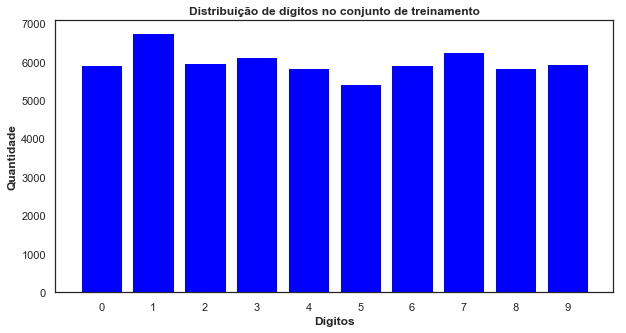

In [5]:
x, y = np.unique(y_train, return_counts=True)

plt.figure(figsize=(10,5))
plt.bar(x, y, color='blue')
plt.xticks(x, rotation=0)
plt.title('Distribuição de dígitos no conjunto de treinamento', fontweight='bold')
plt.xlabel('Dígitos', fontweight='bold')
plt.ylabel('Quantidade', fontweight='bold')
plt.show()

Pela análise do gráfico, notamos que existe um certo balanceamento entre as classes no conjunto de treinamento. Logo, podemos prosseguir para a construção do modelo.

# 4. Construção do Modelo

A rede neural escolhida possui a seguinte arquitetura: 784 entradas (dimensão da imagem: 28x28x1), 256 neurônios na camada intermediária e 10 neurônios na camada de saída, representando cada uma das 10 classes (dígitos de 0 a 9).

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Para compilar o modelo, o otimizador escolhido foi o Adam (com os valores default). Quanto à métrica utilizada para avaliar o modelo, foi escolhida a 'accuracy', que representa a porcentagem de imagens que foram classificadas corretamente pelo modelo.

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2237 - accuracy: 0.9355
Epoch 2/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0928 - accuracy: 0.9722
Epoch 3/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0614 - accuracy: 0.9814
Epoch 4/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0438 - accuracy: 0.9863
Epoch 5/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0329 - accuracy: 0.9896
Epoch 6/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0256 - accuracy: 0.9920
Epoch 7/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0182 - accuracy: 0.9944
Epoch 8/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0157 - accuracy: 0.9948
Epoch 9/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0138 - accuracy: 0.9956
Epoch 10/10
60

Ao final de 10 épocas, o modelo obteve uma precisão em cima do conjunto de treinamento de 0.9968 ou seja, 99.68% das imagens foram classificadas corretamente pelo modelo durante o treinamento. 

# 5. Avaliação do Modelo

Como pode-se observar, a execução do modelo em cima do conjunto de testes resultou em uma precisão de 97.96%, que é um resultado muito bom, apesar de possuir cerca de 1.7% a menos de precisão se comparado com o resultado obtido em cima do conjunto de treinamento.

In [8]:
predict = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.0742 - accuracy: 0.9796


Outra forma bastante útil de ver com o modelo está se comportando é através da Matriz de Confusão.

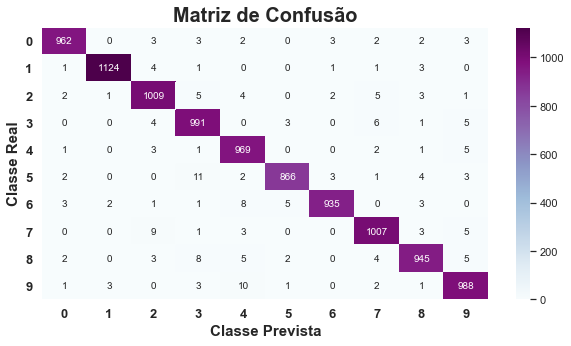

In [9]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis = 1) 
confusion_mtx = confusion_matrix(y_test, y_pred_classes) 
plt.figure(figsize=(10,5))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap="BuPu")
ax.set_ylim(10, 0)
plt.xticks(fontweight='bold', fontsize=13)
plt.yticks(rotation=0, fontweight='bold', fontsize=13)
plt.xlabel('Classe Prevista', fontweight='bold', fontsize=15)
plt.ylabel('Classe Real', fontweight='bold', fontsize=15)
plt.title('Matriz de Confusão', fontweight='bold', fontsize=20)
plt.show()

Através de uma rápida análise na Matriz de Confusão acima, é possível notar que nosso modelo possui um pequeno de problema em classificar corretamente os número 5 e 9, que estão sendo confundidos com os dígitos 3 e 4, respectivamente.

No código abaixo é mostrada a proporção de acertos do nosso modelo em cada uma das 10 classes.

In [10]:
df_confusion = pd.crosstab(y_test, model.predict_classes(x_test), margins=True)
for i in range(10):
    print(i, '->', round(df_confusion.iloc[i][i]/df_confusion.iloc[i][:10].sum(),4))

0 -> 0.9816
1 -> 0.9903
2 -> 0.9777
3 -> 0.9812
4 -> 0.9868
5 -> 0.9709
6 -> 0.976
7 -> 0.9796
8 -> 0.9702
9 -> 0.9792
